In [1]:
# Librairies
import numpy as np
from scipy import sparse
import pandas as pd
import matplotlib.pyplot as plt

path ="/home/gleprince/Documents/Certificat/Projet_2/starting_kit/sample_data"
data = pd.read_csv(path+"/store_train.data",sep=" ",names = ['ID', 'day', 'date', 'nb_customer','open','promo','state','school'])

In [2]:
data.head()

,ID,day,date,nb_customer,open,promo,state,school
0,874,4,2014-12-18,653,1,1,0,0
1,244,1,2013-08-19,448,1,0,0,1
2,222,2,2014-06-10,627,1,0,0,0
3,655,5,2013-04-05,545,1,0,0,1
4,806,4,2013-12-19,729,1,1,0,0


In [3]:
data.dtypes

ID              int64
day             int64
date           object
nb_customer     int64
open            int64
promo           int64
state          object
school          int64
dtype: object

In [4]:
data["date"]=pd.Categorical(data["date"],ordered=False)
data["state"]=pd.Categorical(data["state"],ordered=False)

In [5]:
data_extract=pd.get_dummies(data[["state"]])
rest=data[["ID","day","date","nb_customer","open","promo","school"]]
ddata=pd.concat([data_extract,rest],axis=1)
ddata.head()

,state_0,state_a,state_b,state_c,ID,day,date,nb_customer,open,promo,school
0,1,0,0,0,874,4,2014-12-18,653,1,1,0
1,1,0,0,0,244,1,2013-08-19,448,1,0,1
2,1,0,0,0,222,2,2014-06-10,627,1,0,0
3,1,0,0,0,655,5,2013-04-05,545,1,0,1
4,1,0,0,0,806,4,2013-12-19,729,1,1,0


In [6]:
ddata["state_0"]=pd.DataFrame(ddata["state_0"], dtype=int)
ddata["state_a"]=pd.DataFrame(ddata["state_a"], dtype=int)
ddata["state_b"]=pd.DataFrame(ddata["state_b"], dtype=int)
ddata["state_c"]=pd.DataFrame(ddata["state_c"], dtype=int)
ddata.dtypes
        

state_0           int64
state_a           int64
state_b           int64
state_c           int64
ID                int64
day               int64
date           category
nb_customer       int64
open              int64
promo             int64
school            int64
dtype: object

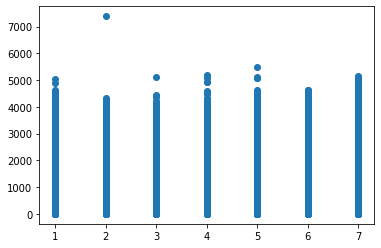

In [64]:
plt.scatter(data["day"],data["nb_customer"])
plt.show()

# ACP

In [7]:
# ACP
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
# réduction des variables
X=scale(ddata[["nb_customer","day","open","state_0","state_a","state_b","state_c","school","promo"]])

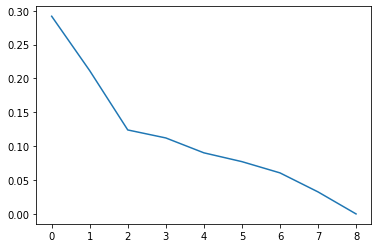

In [8]:
pca = PCA()
## Estimation, calcul des composantes principales
C = pca.fit(X).transform(X)
## Décroissance de la variance expliquée
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [9]:
print(pca.explained_variance_ratio_)

[2.91851830e-01 2.11476376e-01 1.23972456e-01 1.12168200e-01
 9.02125196e-02 7.71901284e-02 6.06005508e-02 3.25279391e-02
 1.06889385e-29]


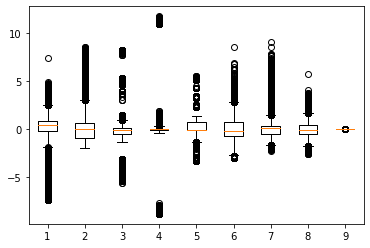

In [10]:
## distribution des composantes principales
plt.boxplot(C[:,0:20])
plt.show()

In [11]:
ex_variance=np.var(C,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print (ex_variance_ratio) 


[2.91851830e-01 2.11476376e-01 1.23972456e-01 1.12168200e-01
 9.02125196e-02 7.71901284e-02 6.06005508e-02 3.25279391e-02
 1.11115165e-29]


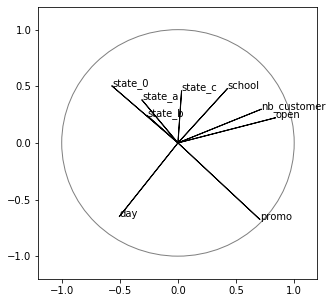

In [12]:
## coordonnées et représentation des variables
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, ddata[["nb_customer","day","open","promo","state_0","state_a","state_b","state_c","school"]].columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

# APPRENTISSAGE


In [13]:
# Variables explicatives
data_extract=pd.get_dummies(data[["state"]])
rest=data[["ID","day","date","open","promo","school"]]
data_test=pd.concat([data_extract,rest],axis=1)
data_test.head()

,state_0,state_a,state_b,state_c,ID,day,date,open,promo,school
0,1,0,0,0,874,4,2014-12-18,1,1,0
1,1,0,0,0,244,1,2013-08-19,1,0,1
2,1,0,0,0,222,2,2014-06-10,1,0,0
3,1,0,0,0,655,5,2013-04-05,1,0,1
4,1,0,0,0,806,4,2013-12-19,1,1,0


In [14]:
# variable à expliquer réelle
Yr=data["nb_customer"]

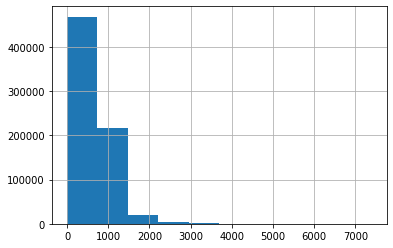

In [15]:
Yr.hist()
plt.show()

In [16]:
from sklearn.model_selection import train_test_split  

X_train,X_test,Yr_train,Yr_test=train_test_split(data_test,Yr,test_size=200,random_state=11)

In [17]:
from sklearn.preprocessing import StandardScaler  
# L'algorithme ds réseaux de neurones nécessite éventuellement une normalisation 
# des variables explicatives avec les commandes ci-dessous
scaler = StandardScaler()  
scaler.fit(X_train)  
Xr_train = scaler.transform(X_train)  
# Meme transformation sur le test
Xr_test = scaler.transform(X_test)
# Mais cela ne semnble pas nécessaire sur ces données.
# Les commandes sont donc fournies à titre indicatif.

ValueError: could not convert string to float: '2013-11-23'

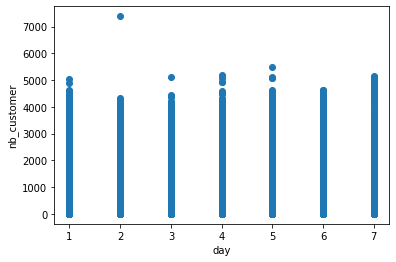

In [27]:
plt.plot(X_train["day"],Yr_train,"o")
plt.xlabel("day")
plt.ylabel("nb_customer")
plt.show()

In [24]:
from sklearn.metrics import r2_score
print("R2=",r2_score(Yr_train,X_train["day"]))

R2= -1.8339508141951906


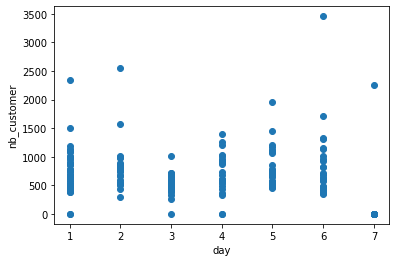

In [26]:
plt.plot(X_test["day"],Yr_test,"o")
plt.xlabel("day")
plt.ylabel("nb_customer")
plt.show()

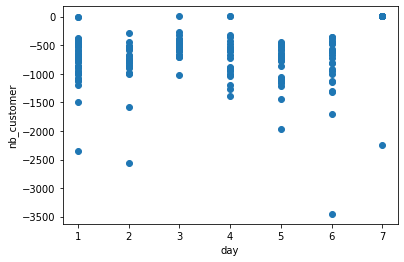

In [28]:
plt.plot(X_test["day"],X_test["day"]-Yr_test,"o")
plt.xlabel("day")
plt.ylabel("nb_customer")
plt.show()

In [29]:
# Erreur quadratique moyenne
from sklearn.metrics import mean_squared_error
print("MSE=",mean_squared_error(X_test["day"],Yr_test))

MSE= 635625.015


In [30]:
# Le coefficient de détermination 
# peut être négatif en prévision avec un mauvais modèle, 
# est nul si la prévision est constante égale à la moyennne
from sklearn.metrics import r2_score
print("R2=",r2_score(Yr_test,X_test["day"]))

R2= -1.6191204637798848


In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
# Optimisation de la profondeur de l'arbre
param=[{"max_depth":list(range(2,10))}]
tree= GridSearchCV(DecisionTreeClassifier(),param,cv=10,n_jobs=-1)
treeOpt=tree.fit(X_train, Yr_train)
# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - treeOpt.best_score_,treeOpt.best_params_))

/home/gleprince/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


ValueError: could not convert string to float: '2013-08-08'